In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# path를 입력받아 immread하고, BGR2RGB로 convert하는 함수
def MyImread(path):
    bgr_img = cv2.imread(path)
    assert bgr_img is not None, "영상 로드 실패"
    
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    return rgb_img

In [2]:
# 영상(RGB)을 입력받아 특징점을 찾고,
# 찾은 특징점을 그려 return하는 함수
#
#    blockSize: 이웃 블록의 범위
#    apertureSize: 소빌 마스크의 크기
#    k: 해리스 코너 수식에서 k이 값
#    thresh: 최대 반응의 일정 비율까지만 허용함 (클수록 조금 검출됨)

def Harris(img, blockSize=2, apertureSize=3, k=0.04, thresh=0.01):
    radian = 3 # 특징점을 표시할 원의 반지름
    color = (255, 0, 0) # 특징점을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께 (-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy() # 영상을 복사하고, 특징점을 그리는데 사용
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Harris corner 검출
    corner_response = cv2.cornerHarris(gray_img, blockSize, apertureSize, k)
    
    # 정규화 (0~1 범위로)
    max_value = np.max(corner_response)
    corner_response /= max_value
    
    # 특징점 그리기
    for y in range(h):
        for x in range(w):
            # thresh 이상의 강한 반응만 검출
            if(corner_response[y,x] > thresh):
                cv2.circle(result_img, (x,y), radian, color, 2)
    
    return result_img

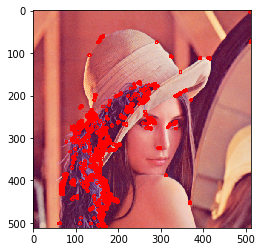

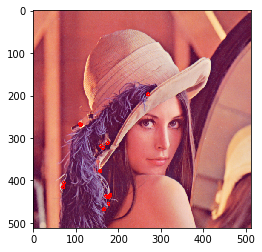

In [3]:
lena = MyImread("./practice5/lena.png")

lena_harris1 = Harris(lena, thresh=0.01)
lena_harris2 = Harris(lena, thresh=0.2)

plt.figure()
plt.imshow(lena_harris1)
plt.figure()
plt.imshow(lena_harris2)

In [8]:
# 영상(RGB)을 입력받아 특징점을 찾고,
# 찾은 특징점을 그려 return하는 함수
#
#    nfeatres: 점수가 높은 n개의 특징점을 리턴 (-1이면 찾은 모든 특징점을 리턴)
#    nOctaveLayers: 몇개의 옥타브를 사용할지 (스케일 공간에서)
#    contrastThreshold: 약한 특징점을 제거하기 위한 threshold값 (클수록 조금 검출됨)
#    edgeThreshold: edge-like 한 특징점을 제거하기 위한 threshold값 (클수록 많이 검출됨)
#    sigma: 첫 가우시안 블러의 sigma 값

def SIFT(img, nfeatures=0, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6, draw_rich=False):
    radian = 3 # 특징점을 윈의 반지름
    color = (255, 0, 0) # 특징점을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께 (-1 이면 윈 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sift = cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)
    kp = sift.detect(gray_img, None)
    
    if draw_rich:
        kp_xy = cv2.drawKeypoints(result_img, kp, result_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    else:
        kp_xy = cv2.KeyPoint_convert(kp)
        for x,y in kp_xy:
            cv2.circle(result_img, (x,y), radian, color, thickness)
            
    return result_img

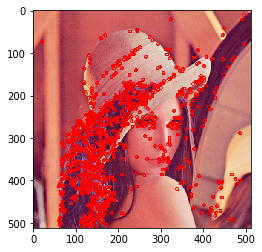

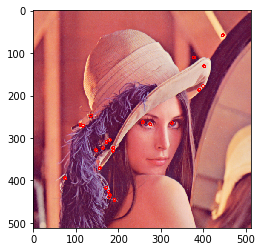

In [9]:
lena = MyImread("./practice5/lena.png")

lena_sift1 = SIFT(lena, nfeatures=0)
lena_sift2 = SIFT(lena, nfeatures=30)

plt.figure()
plt.imshow(lena_sift1)
plt.figure()
plt.imshow(lena_sift2)

In [10]:
# 영상(RGB)을 입력받아 특징점을 찾고,
# 찾은 특징점을 그려 return하는 함수
#
#    hessianThreshlod: 헤시안 행렬 검출에 사용될 threshold
#    nOctaves: 몇 개의 옥타브를 사용할지
#    nOctaveLayers: 한 옥타브에서 몇개의 레이어를 사용할지

def SURF(img, hessianThreshold=400, nOctaves=4, nOctaveLayers=3):
    radian = 3 # 특징점을 표시할 윈의 반지름
    color = (255, 0, 0) # 특징점을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께 (-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    surf = cv2.xfeatures2d.SURF_create(hessianThreshlod, nOctaves, nOctaveLayers)
    kp = surf.detect(gray_img, None)
    
    kp_xy = cv2.KeyPoint_convert(kp)
    for x,y in kp_xy:
        cv2.circle(result_img, (x,y), radian, color, thickness)
    
    return result_img

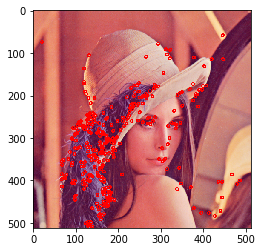

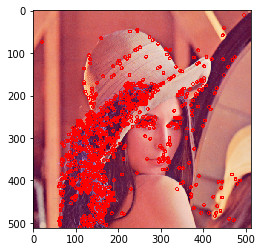

In [11]:
lena = MyImread("./practice5/lena.png")

lena_surf1 = SIFT(lena, nfeatures=400)
lena_surf2 = SIFT(lena, nfeatures=1000)

plt.figure()
plt.imshow(lena_surf1)
plt.figure()
plt.imshow(lena_surf2)

In [12]:
# 영상(RGB)을 입력받아 특징점을 찾고,
# 찾은 특징점을 그려 return하는 함수
#
#    type: 5/8, 7/12, 9/16 세가지가 존재

def FAST(img, type=cv2.FAST_FEATURE_DETECTOR_TYPE_5_8):
    radian = 3 # 특징점을 표시할 윈의 반지름
    color = (255, 0, 0) # 특징점을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께 (-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    fast = cv2.FastFeatureDetector_create(type=type, nonmaxSuppression=True)
    kp = fast.detect(gray_img, None)
    
    kp_xy = cv2.KeyPoint_convert(kp)
    for x,y in kp_xy:
        cv2.circle(result_img, (x,y), radian, color, thickness)
    
    return result_img

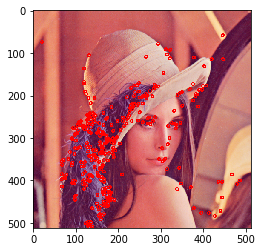

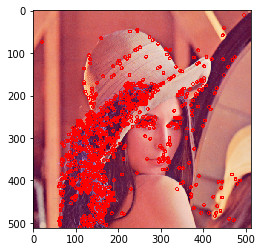

In [13]:
#lena = MyImread("./practice5/lena.png") 없어도 됨

lena_fast1 = FAST(lena, type=cv2.FAST_FEATURE_DETECTOR_TYPE_5_8)
lena_fast2 = FAST(lena, type=cv2.FAST_FEATURE_DETECTOR_TYPE_7_12)

plt.figure()
plt.imshow(lena_surf1)
plt.figure()
plt.imshow(lena_surf2)

In [14]:
#영상 경로를 입력받아 두 함수의 실행 결과를 출력하는 함수
def Compare(path):
    img = MyImread(path)
    img_harris = Harris(img, )
    img_sift = SIFT(img, draw_rich=True)
    
    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img)
    
    plt.subplot(1,3,2)
    plt.title("Harris")
    plt.imshow(img_harris)
    
    plt.subplot(1,3,3)
    plt.title("SIFT")
    plt.imshow(img_sift)

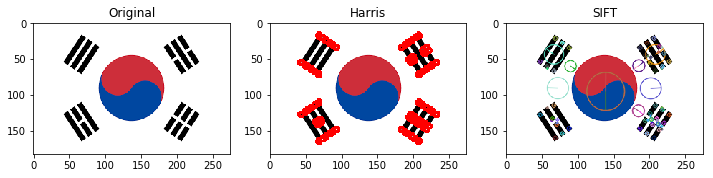

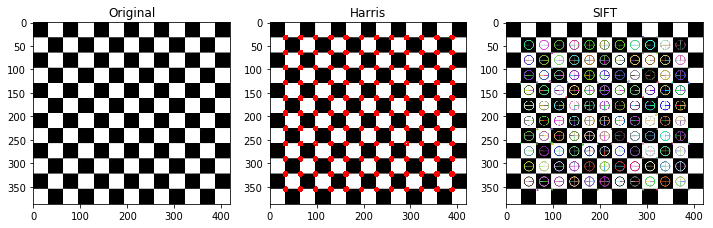

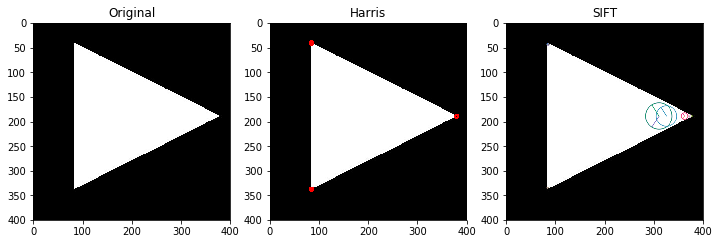

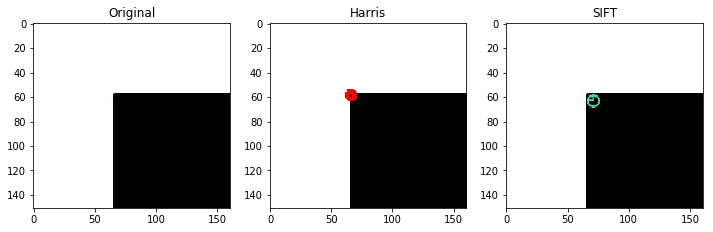

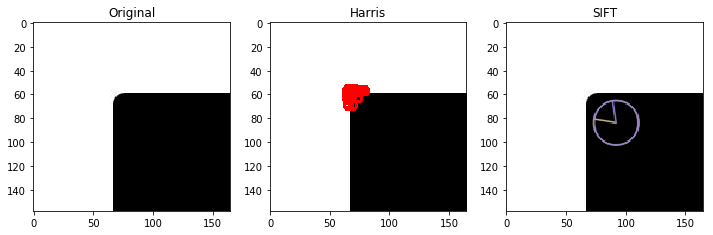

In [17]:
Compare("./practice5/korea.png")
Compare("./practice5/checkerboard.png")
Compare("./practice5/triangle.jpg")
Compare("./practice5/test1.jpg")
Compare("./practice5/test2.jpg")

In [4]:
# 영상을 입력받아 face detection을 수행하고,
# 얼굴 영역에 네모를 그려 return해주는 함수
def FaceDetection(img):
    color = (255, 0, 0) # 얼굴 영역을 표시할 네모의 색상 지정
    thickness = 2 # 네모의 두께
    
    result_img = img.copy()
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 이미 학습되어있는 Haar Cascade Classifier 로드
    face_cascade = cv2.CascadeClassifier("./practice5/haarcascade_frontalface_default.xml")
    
    # 얼굴 검출 수행
    faces = face_cascade.detectMultiScale(gray_img, 1.1, 5)
    
    # 검출된 얼굴 영역 그리기
    for (x,y,w,h) in faces:
        cv2.rectangle(result_img, (x,y), (x+w,y+h), color, 2)
    
    return result_img

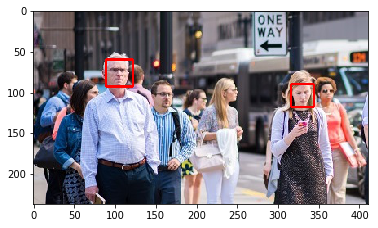

In [51]:
faces = MyImread("./practice5/pedestrian.jpg")

detected_faces = FaceDetection(faces)
plt.imshow(detected_faces)

In [5]:
import numpy as np
import cv2

cap = cv2.VideoCapture("./practice5/Walking.mp4")

while(cap.isOpened()):
    ret, frame = cap.read()
    
    frame = cv2. resize(frame,(400,225))
    
    detected_faces = FaceDetection(frame)
    
    cv2.imshow('frame', frame)
    cv2.imshow('detected', detected_faces)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [6]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(cap.isOpened()):
    ret, frame = cap.read()
    
    frame = cv2. resize(frame,(400,225))
    detected_faces = FaceDetection(frame)
    
    cv2.imshow('frame', frame)
    cv2.imshow('detected', detected_faces)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
